In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit, differential_evolution
import csv
from data_read import data_read
from rebinning import rebinning
from fit import fit
from get_rates import get_rates
from get_bkg import get_bkg

In [2]:
x = np.array([7.067490337,7.194812156,6.494812281,6.23636959,7.150309224,6.345109906,6.969508675])
y = np.array([-2.911415335,-2.907272828,-2.377631032,-2.317897579,-2.774307162,-2.359293113,-2.70753635])
sy = np.array([0.066833504,0.066537479,0.018017314,0.023346432,0.02714078,0.02255179,0.031275572])

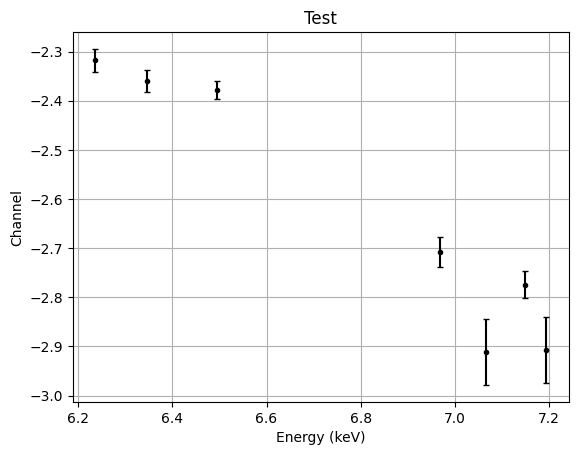

In [3]:
plt.errorbar(x, y, yerr=sy,capsize=2,fmt='.',c="black")
plt.title('Test')
plt.xlabel('Energy (keV)')
plt.ylabel('Channel')
plt.grid()

plt.show()

In [4]:
def func(x,*p):
    return (p[0] + p[1]*x)
    

In [5]:
res_param, res_xi2, res_cov = fit(x,y,sy,func,[2.07914427,-0.54412459])

In [6]:
print(res_param)
print(res_xi2)

[ 1.23422347 -0.56350333]
3.767250045937743


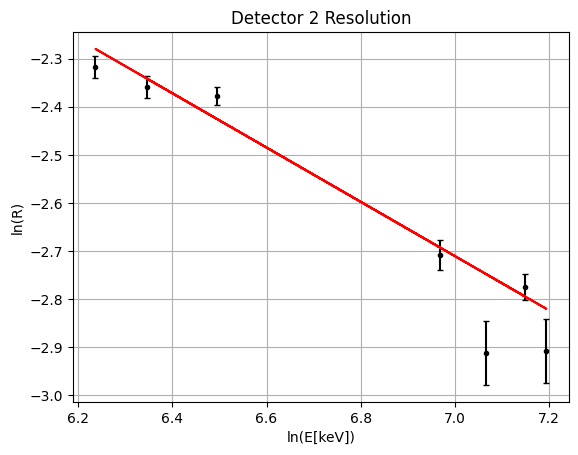

In [11]:
plt.grid()
plt.xlabel('ln(E[keV])')
plt.ylabel('ln(R)')
plt.title('Detector 2 Resolution')
plt.errorbar(x, y, yerr=sy,capsize=2,fmt='.',c="black",label='Data')
plt.plot(x, func(x,*res_param), 'r-', label='Fit')
#plt.savefig('./Plots/Resolucion/ResDetector2.png')
plt.show()

In [8]:
N = 2

In [9]:
for i in range(N):
    print('p'+str(i)+' = '+str(res_param[i]))
    # print(str(res_param[i]))

p0 = 1.2342234733502977
p1 = -0.5635033294404622


In [10]:
for i in range(N):
    print('s(p'+str(i)+') = '+str(np.sqrt(res_cov[i,i])))
    # print(str(np.sqrt(res_cov[i,i])))

s(p0) = 0.38911124869189134
s(p1) = 0.058998965895514864
